In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data[(iris.target==0)|(iris.target==2),0:2:1]
y = iris.target[(iris.target==0)|(iris.target==2)]
X.shape

(100, 2)

In [3]:
from sklearn.preprocessing import scale
X = scale(X)

In [4]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=100.0)
lsvc.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [5]:
lsvc.coef_

array([[ 6.337767  , -2.05366458]])

In [6]:
lsvc.intercept_

array([3.41061428])

(1.0, 5.0)

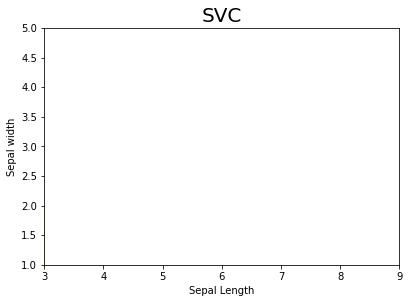

In [7]:
xx,yy = np.meshgrid(np.linspace(-3.0,3.0,201),np.linspace(-2.0,2.0,201))
predic = lsvc.predict(np.c_[xx.ravel(),yy.ravel()])
Z_lsvc= predic.reshape(np.shape(xx))

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.contourf(xx,yy,Z_lsvc,3,alpha=0.5)
plt.scatter(X.T[0], X.T[1],c=y)
plt.axis('scaled')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.title('SVC', fontsize =20)
plt.xlim(3.0,9.0)
plt.ylim(1.0,5.0)